# Blurring & smoothing effects and how to control it

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def load_img():
    img = cv.imread("Data/brick_wall.jpg").astype(np.float32) / 255  # becouse float image data range betweem 0 and 1 not like integers
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

In [30]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

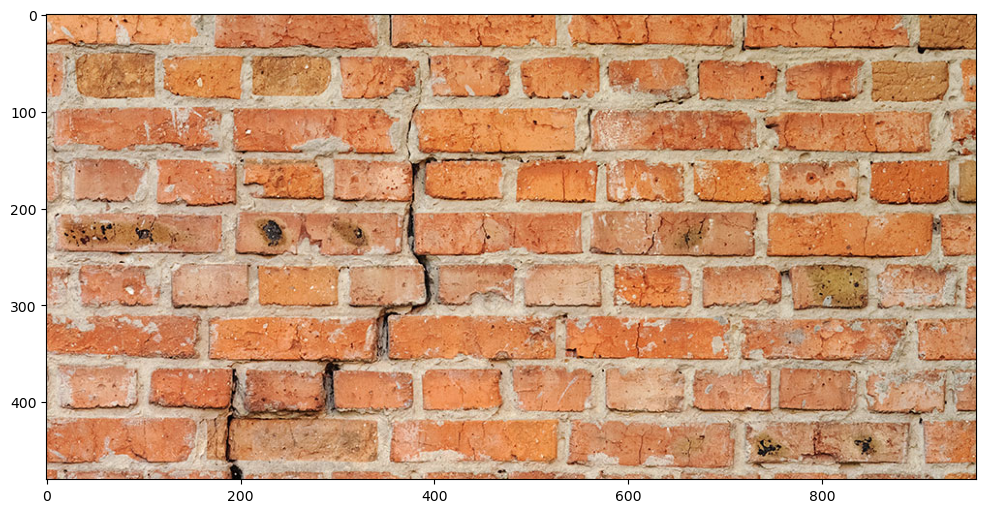

In [63]:
img = load_img()
display_img(img)

## The gamma effect

### Gamma correction adjusts the brightness and color balance of an image. Here's a simpler way to explain how it works:
#### When the gamma value is greater than 1, the image gets darker.
#### When the gamma value is less than 1, the image gets brighter.

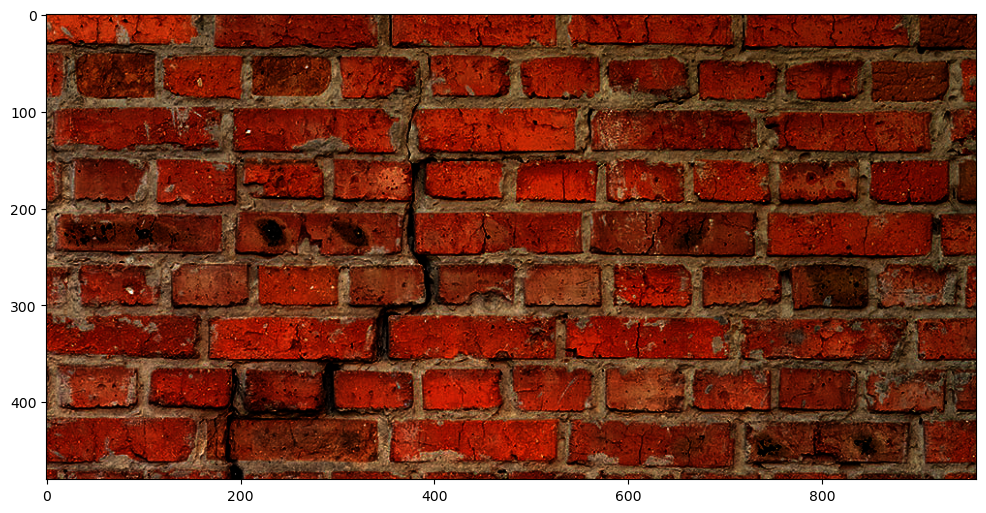

In [37]:
gamma = 4
gamma_img = np.power(img, gamma)
display_img(gamma_img)

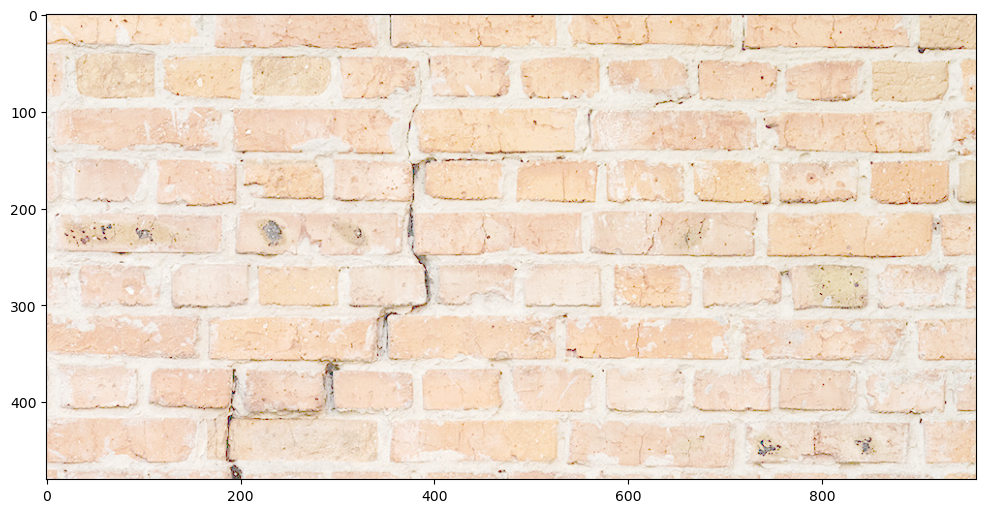

In [38]:
gamma = 1/4
gamma_img = np.power(img, gamma)
display_img(gamma_img)

### Let's revisit one of the methods we use to add text to an image.

In [88]:
def put_text(img):
    font = cv.FONT_HERSHEY_COMPLEX
    cv.putText(img, "Hi bud", (50,300), font, 7.5, (0,0,255), 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


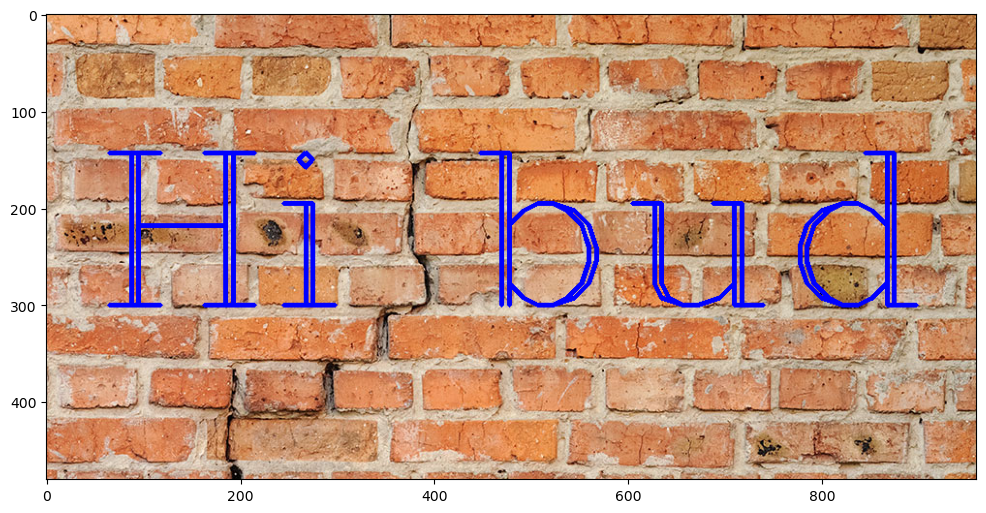

In [89]:
img = load_img()
put_text(img)
display_img(img)

## The Kernel Method: Our First Blurring Technique

In [86]:
kernal = np.ones(shape=(4,4),dtype = np.float32)/25
kernal

array([[0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04]], dtype=float32)

### A larger kernel matrix causes more blurring. The brightness of the image is determined by the sum of the values within the kernel, not its size.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..163.19998].


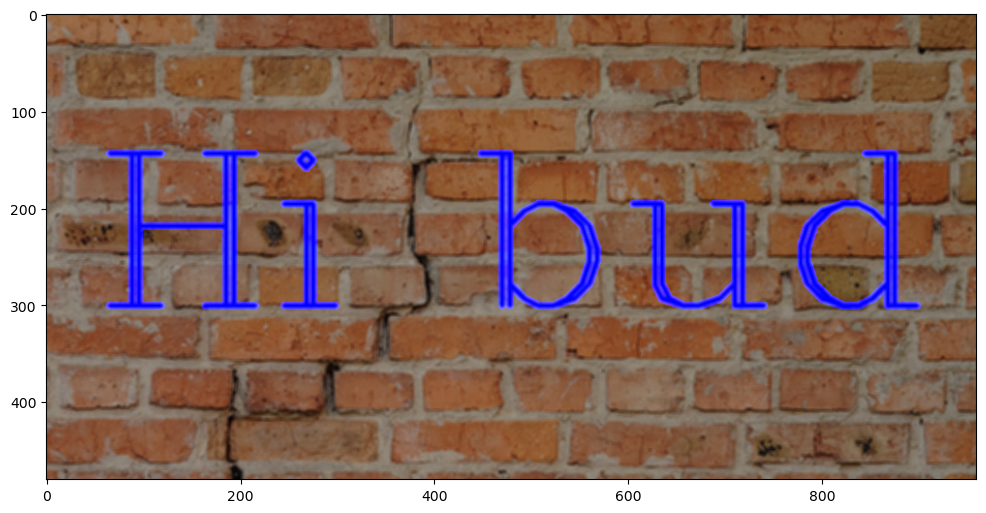

In [87]:
k_filtered_img = cv.filter2D(img, -1, kernal)
display_img(k_filtered_img)

## A Built-in OpenCV Blur Function

### uses a kernel whose size and properties are specified by the user as an input parameter. The function then applies this kernel to the image to achieve the blurring effect.

### the new value of each pixel in the blurred image is the average of the values of the surrounding pixels in the original image.

#### The mean blur's main parameter is the kernel size, which you must provide. This defines the width and height of the box that is averaged to blur the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


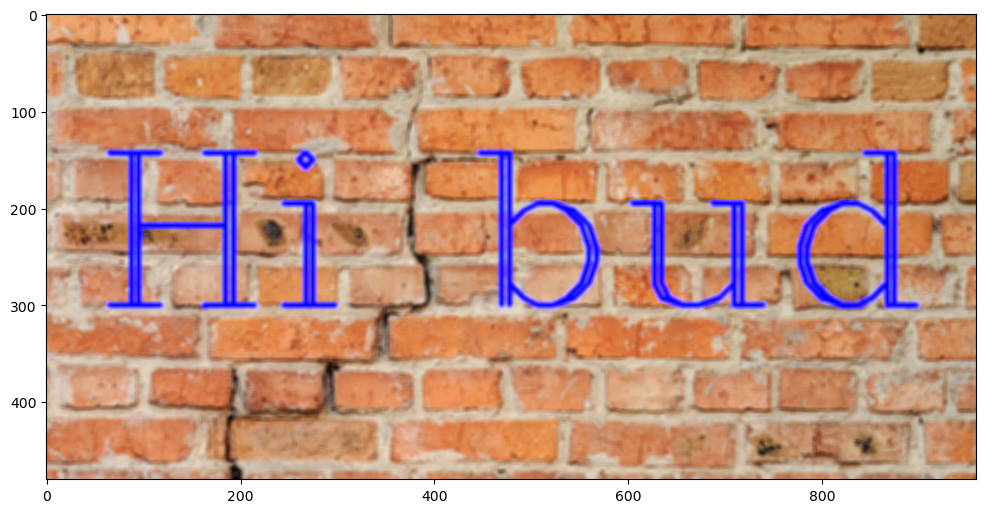

In [105]:
img = load_img()
put_text(img)
blurred_img = cv.blur(img, ksize = (5,5))
display_img(blurred_img)

##  Gaussian blur
### a type of blurring that uses a weighted average of surrounding pixels, giving more importance to the pixels closer to the center of the kernel. This creates a much smoother, more natural-looking blur than a simple mean filter.

#### Gaussian blur requires a kernel size and the standard deviation for both the x and y axes. The standard deviation controls the amount of blurring—a higher value results in a more blurred image (must be odd values in the tuple).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


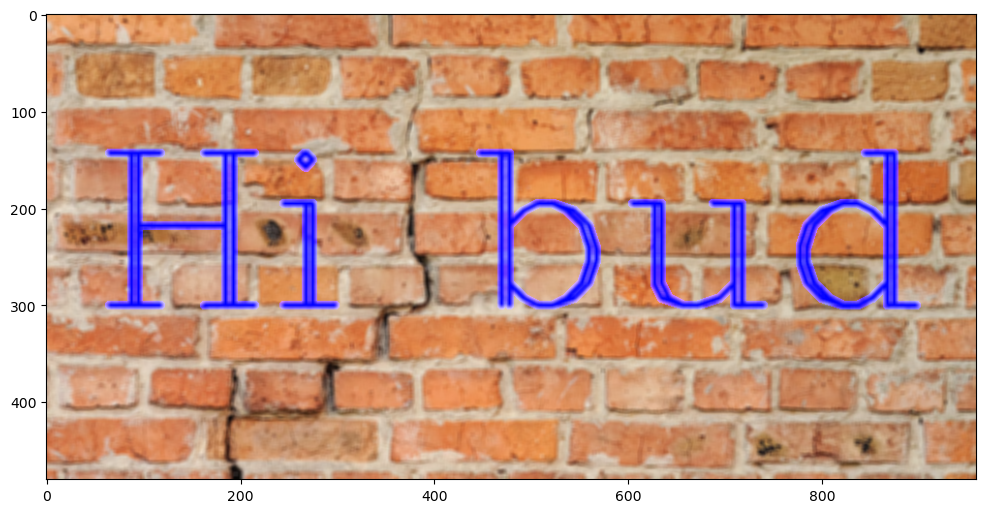

In [130]:
img = load_img()
put_text(img)
blurred_img = cv.GaussianBlur(img, (5,5),10)
display_img(blurred_img)

## Median Blur and Noise Removal

### The primary purpose of a median blur is to remove noise from an image, particularly "salt and pepper" noise. It achieves this by replacing each pixel with the median value of its neighbors, effectively eliminating random, extremely bright or dark pixels without blurring important edges.

#### For the median blur, the only parameter you need to set is the kernel size. Since the function finds the median of the pixels, it does not need a standard deviation or any other parameters.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


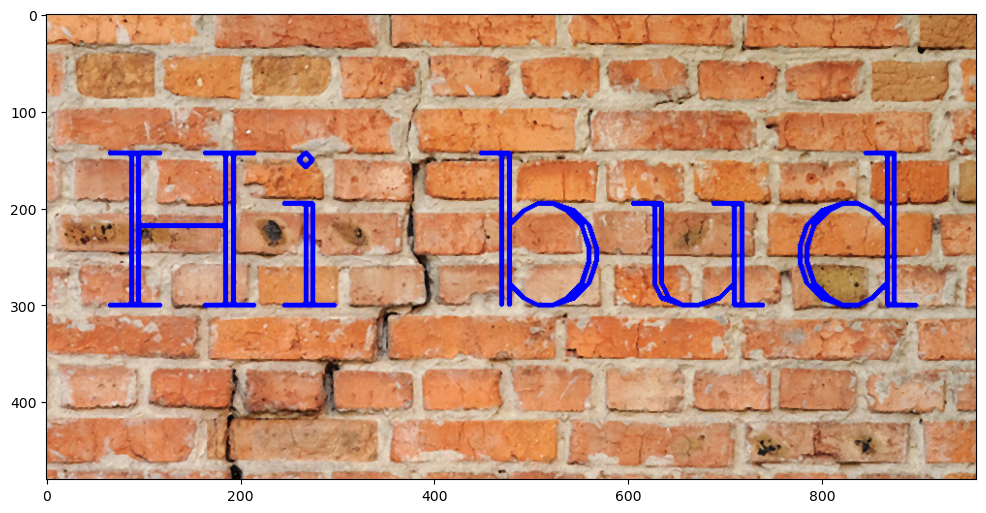

In [119]:
img = load_img()
put_text(img)
blurred_img = cv.medianBlur(img, 3) 
display_img(blurred_img)

## Bilateral Filter

### The bilateral filter stands out because it blurs an image's smooth areas, like skin, while perfectly preserving sharp edges, such as the outline of a face or the lines in a building. It's a "smart" blur that reduces noise without sacrificing important details.

#### It creates a smooth, natural-looking blur, similar to what a Gaussian filter does.

#### It preserves sharp edges, a task where a median filter excels.

### The bilateral filter is more complex, requiring three key parameters:

#### Diameter: The size of the neighborhood around each pixel to be blurred.

#### Sigma Color: This determines how much colors that are different from the center pixel's color will be considered in the blur. A larger value means more colors in the neighborhood will be included.

#### Sigma Space: This controls how much pixels that are far away from the center pixel will influence the blur. A larger value means pixels farther away will still have an effect.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.00009].


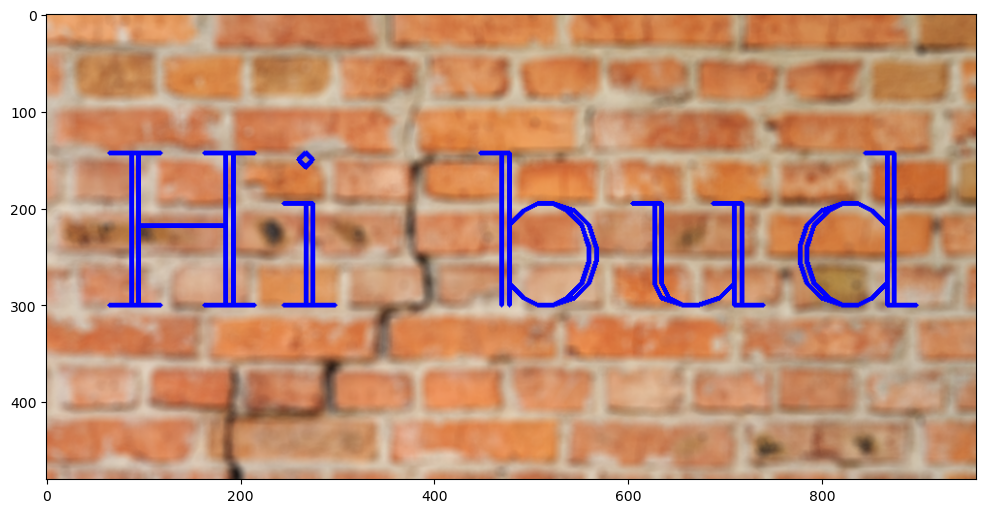

In [125]:
img = load_img()
put_text(img)
blurred_img = cv.bilateralFilter(img,12,25,25) 
display_img(blurred_img)

## Thank you for reading and goodbye